## **Data Preprocessing**









  ## Pre-processing Libraries
  There are a few critical libraries that are used for data preprocessing in general.
  Here is a short summary of those and what they do:
  1. Numpy - Manipulation for multi-dimensional arrays and matrices.
  2. Pandas - Data import and manipulation.
  3. Matplotlib - Data visualization.
  4. Seaborn - Based on matplotlib; plotting statistical graphics.
  5. Warning - Support warnings
  6. LabelEncoder - Convert categorical data to numerical data.


#### Import Libraries



In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder  #for categorical to numerical


##### Code Explanation

- `Classes`
    1. `Process`:
          Kind of initial class that all other classes inherits from it .
    2. `Descriptor`:
        Provides all basic infos of datasets by these funtions :
       - basic_dataset_info
       - statistical_infos
    
    3. `DataDisplay`: 
        
        provides additional method for displaying 10 first column of dataset. 

        the plots are ox whisker and histogram with distribution line over it . 
    4. `DataCleaner`:
        As the most important class of this notebook designed to clean the data sets by these functions:
        - drop_columns_with_null_values: drops columns with more than threshold missing values .
        the threshold is set 0.5.
        - categorical_to_numerical: For future process we have to transform categoricals to nmerical and I have used "LabelEncoder" library and fit.transform method.
        - fill_missing_values:  The missing values in the data set and those values which have been wrongly filled by 7 , 9 and their combinations; are all replaced by median.
        - fill_missing_values_target: In Questioner dataset which has the taget data of this project there are columns with missing values so the classification of output will be changed to:
            0 : unkown 
            1 : positive 
            2 : negetive
        - save_cleaned_dataset: Save data :)
    
`Note1`: After the code all functions are applied to each dataset and the result them are printed, so it can be interpretable.

`Note2`: By the end of this notebook all cleaned data from each dataset are integrated and save by name "integrated_data"

In [2]:
class  Preprocess:
    def __init__(self , path):
        self.path = path
        self.df = pd.read_csv(path, index_col="SEQN")

class Descriptor(Preprocess):
    def basic_dataset_info(self):
        print(" Basic information from dataset:")
        print("-" * 100)
        print(" First 5 rows dataset")
        print(self.df.head())
        print("-" * 100)

        print("\n Dimensions of the dataset:")
        print(self.df.shape)
        print("-" * 100)
        
        print("\n Info of the data:")
        print(self.df.info())
        print("-" * 100)

        print("\n Checking the datatypes of the columns")
        print(self.df.dtypes)


    def stastistical_infos(self):
        print("-" * 100)
        print("\n Statistical information:")
        print(self.df.describe())
        print("-" * 100)


In [3]:
class DataDisplay(Preprocess):
    def box_hist_distribution_plot(self):
        for column in (self.df.columns[:10]):
            fig, axes = plt.subplots(1, 2, figsize=(15,5))
            sns.boxplot(self.df[column], ax=axes[0])
            sns.histplot(self.df[column], kde=True, ax=axes[1])
            plt.xlabel(column)

            plt.show()

In [4]:
class DataCleaner(Preprocess):

    def drop_columns_with_null_values(self , threshold=0.5):
      """Drop columns with more than `threshold` missing values.
    
      Args:
        threshold: A float between 0 and 1. The proportion of missing values
          required to drop a column.
    
      Returns:
        A pandas DataFrame with the specified columns dropped.
      """

      missing_values_threshold = self.df.isnull().sum() / len(self.df)
      columns_to_drop = missing_values_threshold[missing_values_threshold > threshold].index
      self.df = self.df.drop(columns_to_drop, axis=1) #update dataframe  inplace
      return self.df
    
    def categorical_to_numerical(self):
      non_numeric_columns = self.df.select_dtypes(exclude=["int64", "float64"])
      if len(non_numeric_columns)!=0 :
          print("-" * 100)
          print(" Categorical columns:\n ")
          print(non_numeric_columns)
          print("-" * 100)

          # Categorical to Numerical 
          for column in non_numeric_columns:
              label_encoder = LabelEncoder()
              self.df[column] = label_encoder.fit_transform(self.df[column])
          print(self.df)
                
    def fill_missing_values(self):
      
      print("-" * 100)
      print("\n Dimensions of the dataset:")
      print(self.df.shape)
      print("-" * 100)

      """
      In dataset when the patient refused to answer , 7 or 9 ar combinations have been used,
      so it's recommeneded to be replaed by nan value and then being treated as a missing values!
      """
      for column in self.df.columns:
        self.df[column] = self.df[column].replace([7, 77, 777], np.nan)
        self.df[column] = self.df[column].replace([9, 99, 999] , np.nan)
      
      print("\n Number of missing values in each dimension:")
      print(self.df.isnull().sum())
      print("-" * 100)
      print("\n")
      print(self.df.median())
      print("-" * 100)
      print("\n")
      self.df = self.df.fillna(self.df.median())
      
      print("-" * 100)
      print("\n Number of missing values in each dimension:")
      print(self.df.isnull().sum())
      return self.df
    
    def fill_missing_values_target(self):
      print("-" * 100)
      print("\n Dimensions of the dataset:")
      print(self.df.shape)
      print("-" * 100)
      print("\n Number of missing values in each dimension:")
      print(self.df.isnull().sum())
      print("-" * 100)       
      self.df = self.df.fillna(0)
      print("-" * 100)
      print("\n Filling value is applied, so number of missing values in each dimension:")
      print(self.df.isnull().sum())
      return self.df
    
    def save_cleaned_dataset(self, name):
      print("-" * 100) 
      print("\n Dimensions of the dataset:")
      print(self.df.shape)
      print("-" * 100) 
      self.df.to_csv(("/home/asma-rashidian/Documents/DrRahmani_projects/project1/data/processed/%s.csv")%name)
    

#### Exploration in datasets
    These datasets are explored, also all the result for each one is stored too!
    1. demographic.csv
    2. diet.csv
    3. examination.csv
    4. labs.csv
    5. questionnaire.csv   

#### 1. Demographic Dataset

In [5]:
#Loading data and setting the unique patient as the index
demographic_path = '/home/asma-rashidian/Documents/DrRahmani_projects/project1/data/raw/demographic.csv'
demographic_descriptor = Descriptor(demographic_path)
demographic_descriptor.basic_dataset_info()
demographic_descriptor.stastistical_infos()


 Basic information from dataset:
----------------------------------------------------------------------------------------------------
 First 5 rows dataset
       SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  RIDRETH3  \
SEQN                                                                          
73557         8         2         1        69       NaN         4         4   
73558         8         2         1        54       NaN         3         3   
73559         8         2         1        72       NaN         3         3   
73560         8         2         1         9       NaN         3         3   
73561         8         2         2        73       NaN         3         3   

       RIDEXMON  RIDEXAGM  DMQMILIZ  ...  DMDHREDU  DMDHRMAR  DMDHSEDU  \
SEQN                                 ...                                 
73557       1.0       NaN       1.0  ...       3.0       4.0       NaN   
73558       1.0       NaN       2.0  ...       3.0       1.0       1

In [6]:
demographic_cleaner = DataCleaner(demographic_path)
demographic_cleaner.drop_columns_with_null_values()
demographic_cleaner.fill_missing_values()
demographic_cleaner.save_cleaned_dataset("demographic")

----------------------------------------------------------------------------------------------------

 Dimensions of the dataset:
(10175, 40)
----------------------------------------------------------------------------------------------------

 Number of missing values in each dimension:
SDDSRVYR       0
RIDSTATR       0
RIAGENDR       0
RIDAGEYR     484
RIDRETH1       0
RIDRETH3     470
RIDEXMON     362
DMQMILIZ    3915
DMDBORN4       5
DMDCITZN      11
DMDEDUC2    4413
DMDMARTL    4409
SIALANG        0
SIAPROXY       1
SIAINTRP       0
FIALANG      121
FIAPROXY     121
FIAINTRP     121
MIALANG     2864
MIAPROXY    2863
MIAINTRP    2862
AIALANGA    3858
DMDHHSIZ     926
DMDFMSIZ     820
DMDHHSZA       0
DMDHHSZB       0
DMDHHSZE       0
DMDHRGND       0
DMDHRAGE      46
DMDHRBR4     309
DMDHREDU     321
DMDHRMAR     176
DMDHSEDU    4850
WTINT2YR       0
WTMEC2YR       0
SDMVPSU        0
SDMVSTRA       0
INDHHIN2    1894
INDFMIN2    1852
INDFMPIR     785
dtype: int64
------------------

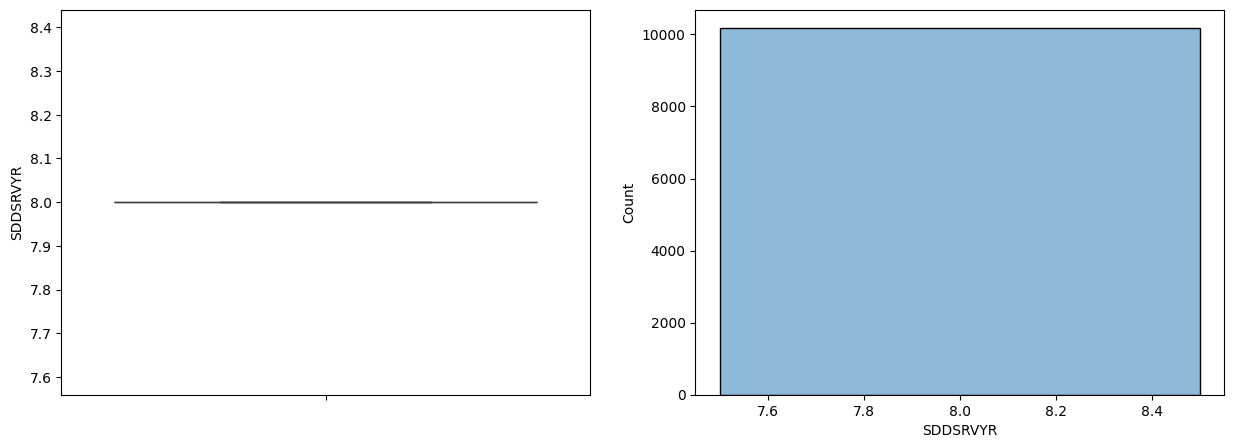

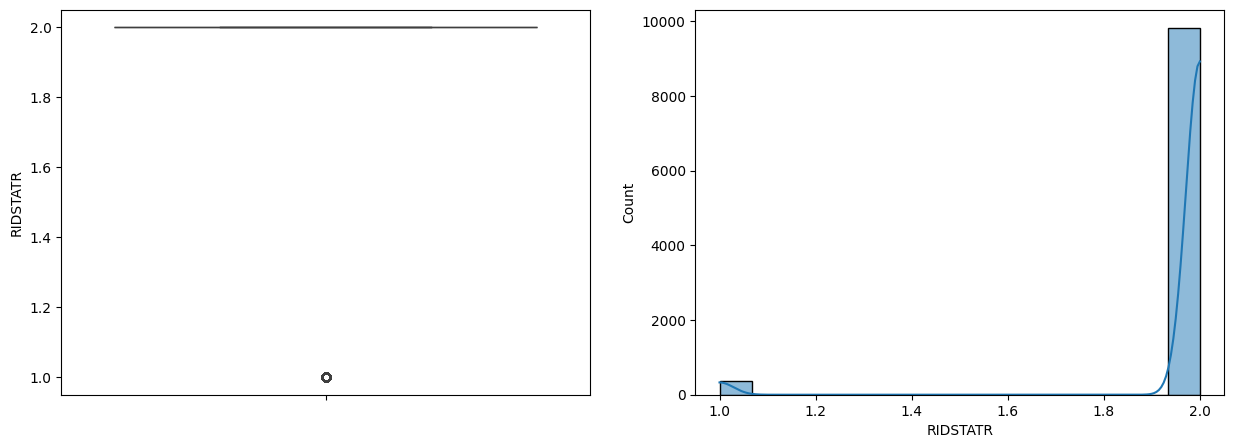

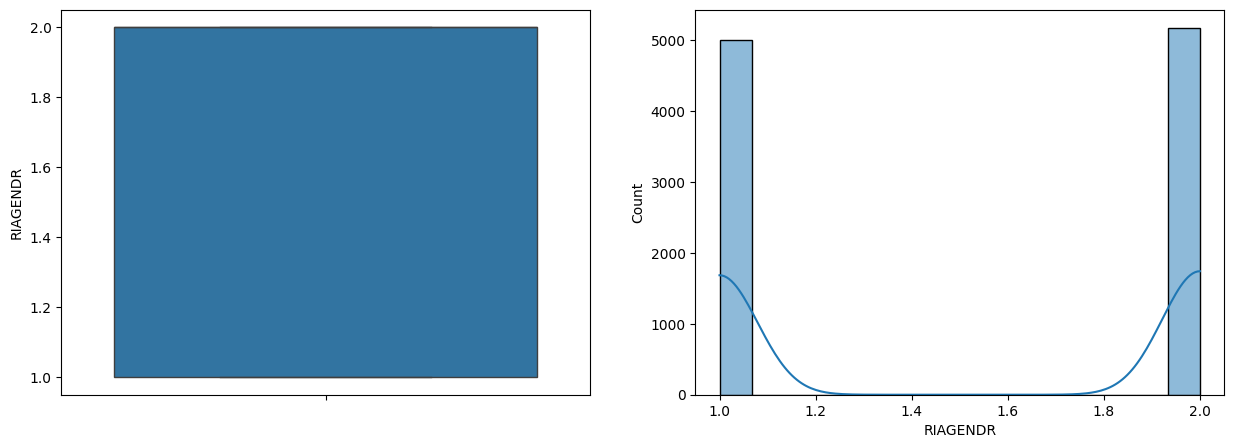

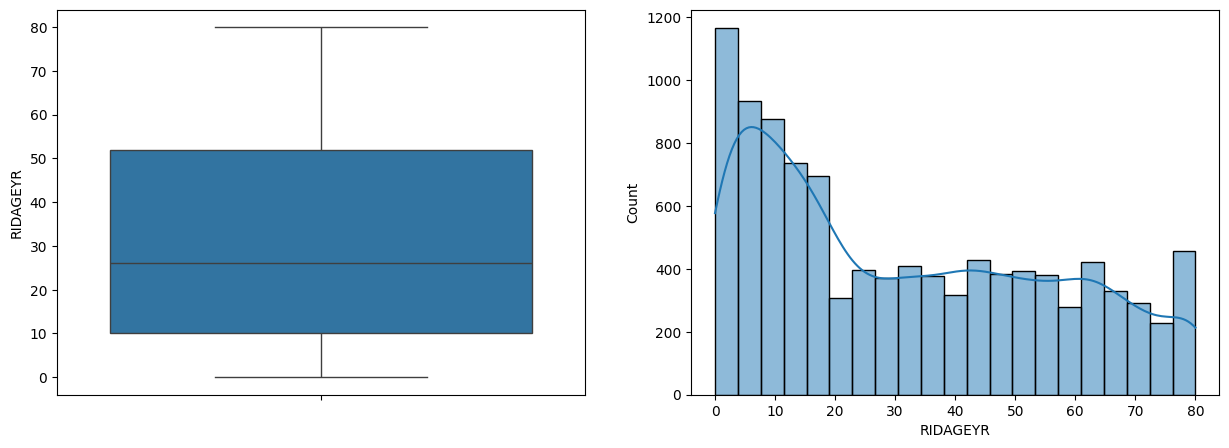

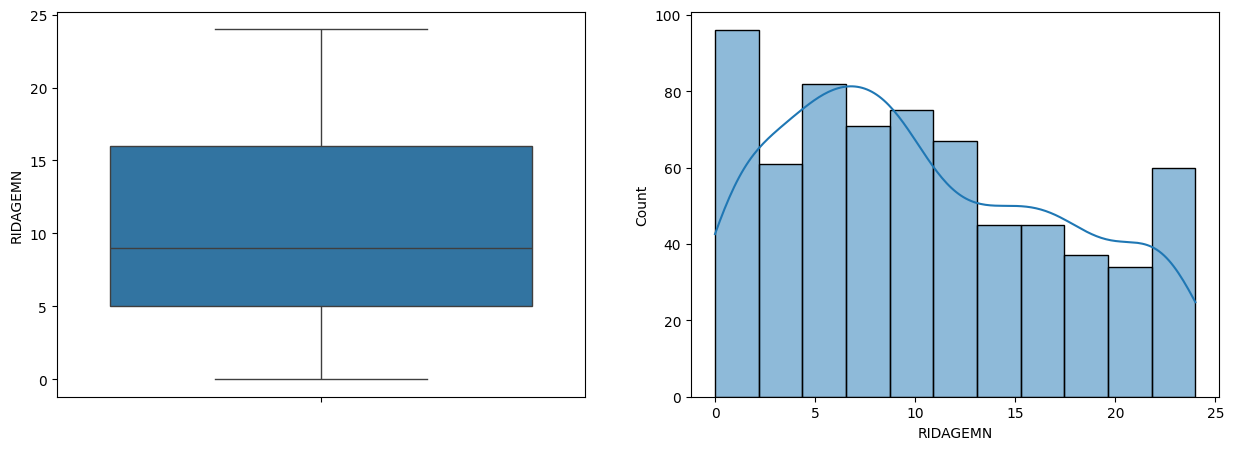

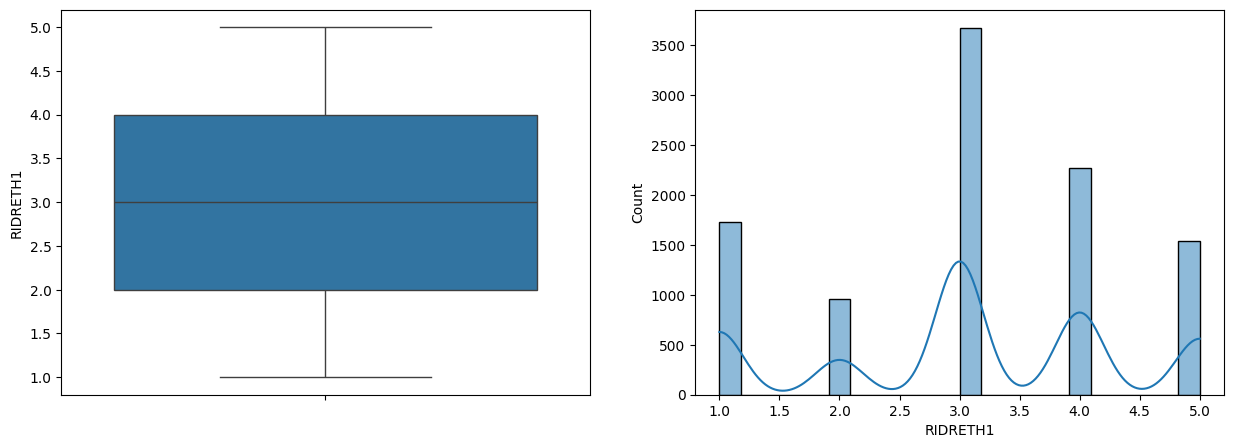

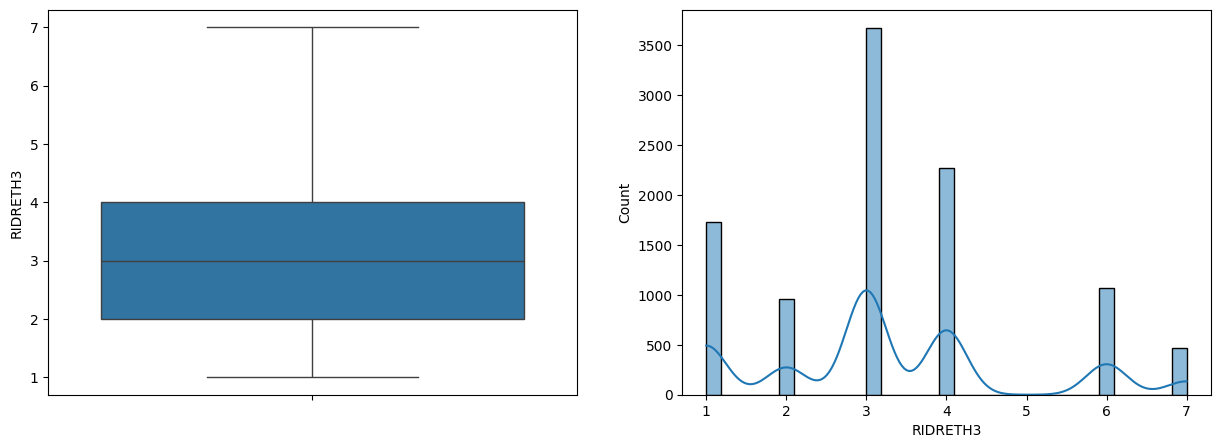

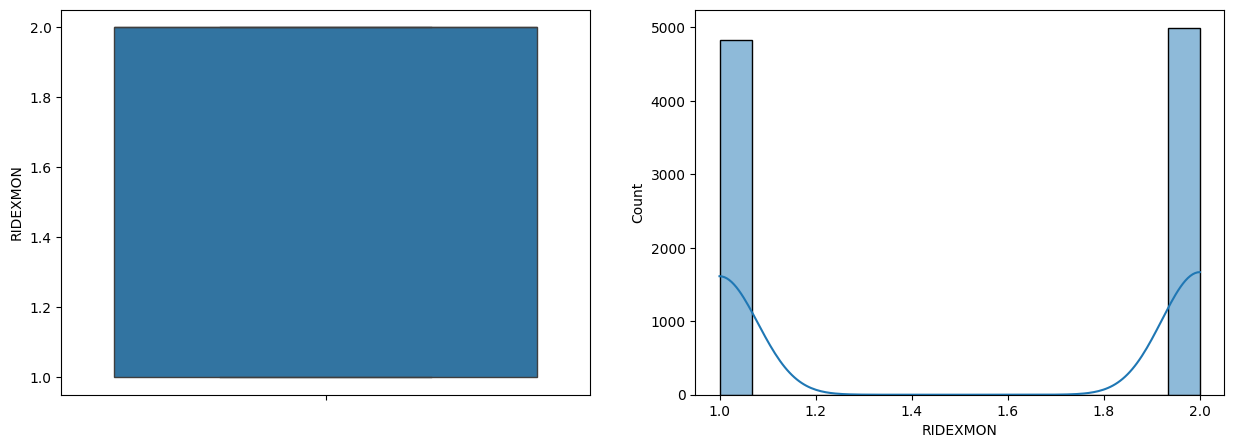

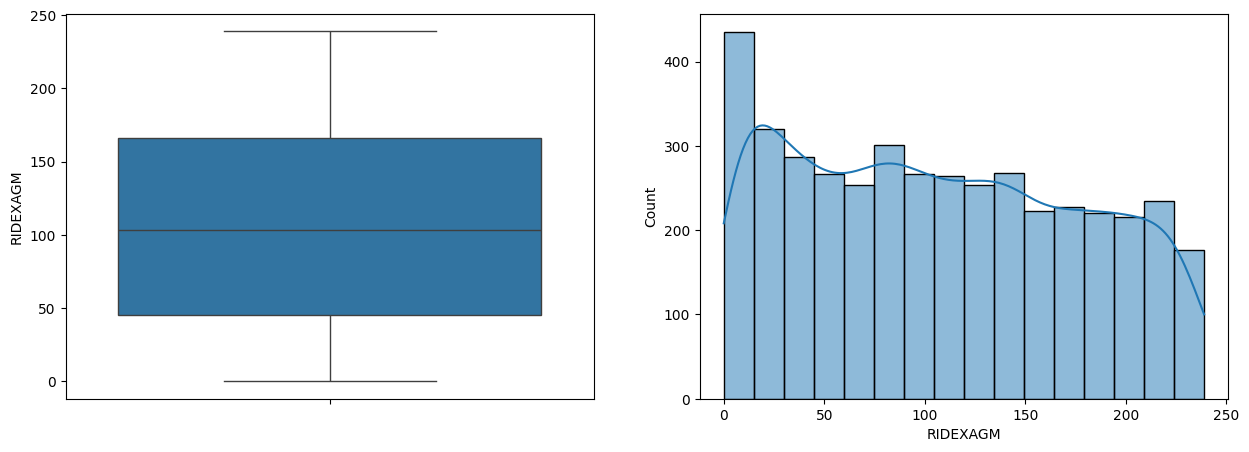

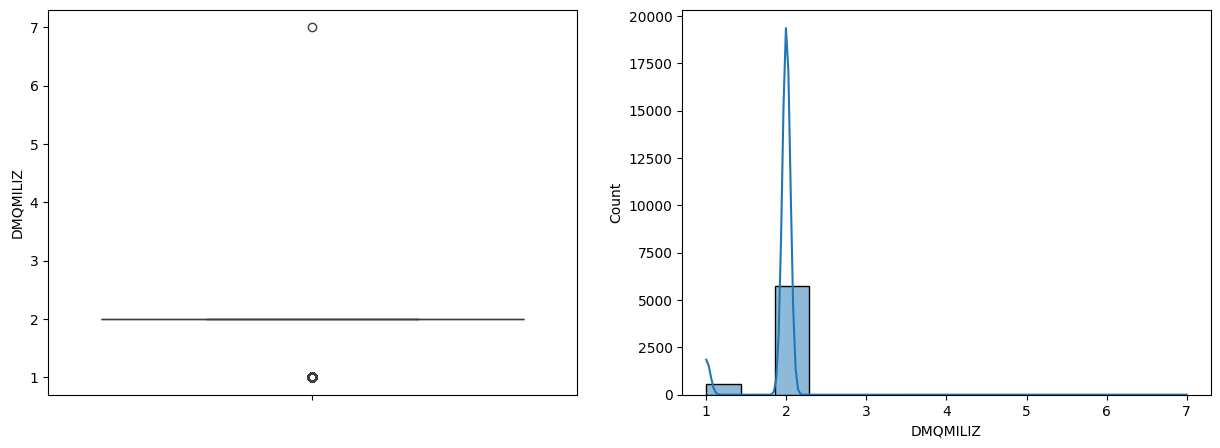

In [7]:
data_display = DataDisplay(demographic_path)
data_display.box_hist_distribution_plot()

#### 2.Diet Dataset

In [8]:
diet_path = '/home/asma-rashidian/Documents/DrRahmani_projects/project1/data/raw/diet.csv'
diet_descriptor = Descriptor(diet_path)
diet_descriptor.basic_dataset_info()
diet_descriptor.stastistical_infos()




 Basic information from dataset:
----------------------------------------------------------------------------------------------------
 First 5 rows dataset
              WTDRD1         WTDR2D  DR1DRSTZ  DR1EXMER  DRABF  DRDINT  \
SEQN                                                                     
73557   16888.327864   12930.890649         1      49.0    2.0     2.0   
73558   17932.143865   12684.148869         1      59.0    2.0     2.0   
73559   59641.812930   39394.236709         1      49.0    2.0     2.0   
73560  142203.069917  125966.366442         1      54.0    2.0     2.0   
73561   59052.357033   39004.892993         1      63.0    2.0     2.0   

       DR1DBIH  DR1DAY  DR1LANG  DR1MNRSP  ...  DRD370QQ  DRD370R  DRD370RQ  \
SEQN                                       ...                                
73557      6.0     2.0      1.0       1.0  ...       NaN      NaN       NaN   
73558      4.0     1.0      1.0       1.0  ...       NaN      2.0       NaN   
73559    

In [9]:
diet_cleaner = DataCleaner(diet_path)
diet_cleaner.drop_columns_with_null_values()
diet_cleaner.fill_missing_values()
diet_cleaner.save_cleaned_dataset("diet")

----------------------------------------------------------------------------------------------------

 Dimensions of the dataset:
(9813, 111)
----------------------------------------------------------------------------------------------------

 Number of missing values in each dimension:
WTDRD1         0
WTDR2D      1152
DR1DRSTZ       0
DR1EXMER    1030
DRABF       1152
            ... 
DRD370R     4692
DRD370S     4692
DRD370T     4692
DRD370U     4692
DRD370V     4693
Length: 111, dtype: int64
----------------------------------------------------------------------------------------------------


WTDRD1      19276.118837
WTDR2D      17874.047830
DR1DRSTZ        1.000000
DR1EXMER       49.000000
DRABF           2.000000
                ...     
DRD370R         2.000000
DRD370S         2.000000
DRD370T         2.000000
DRD370U         2.000000
DRD370V         2.000000
Length: 111, dtype: float64
--------------------------------------------------------------------------------------------

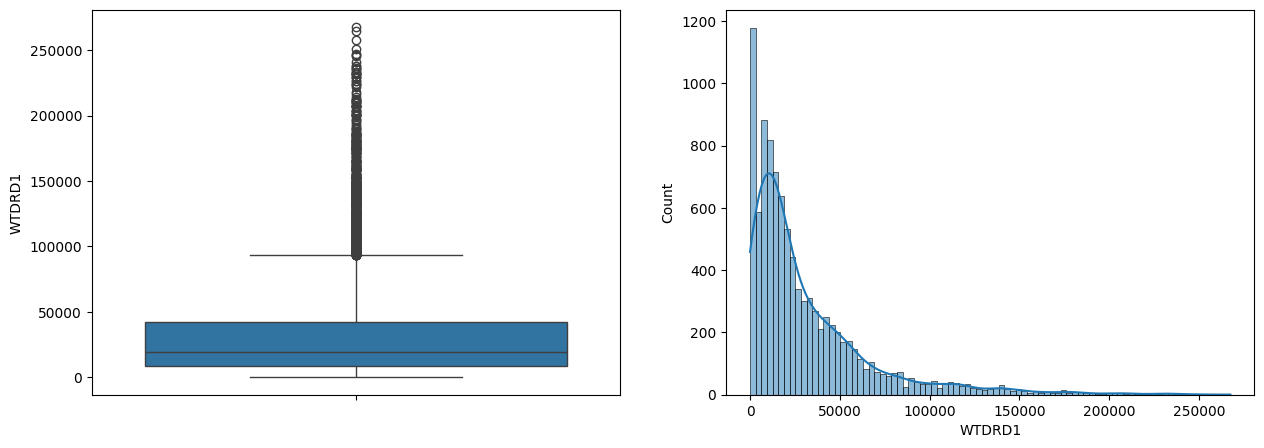

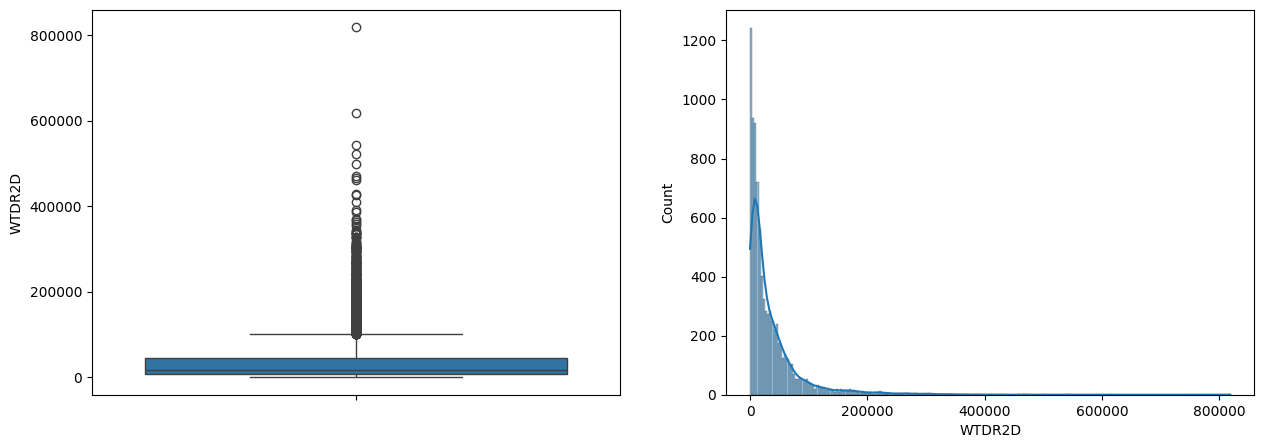

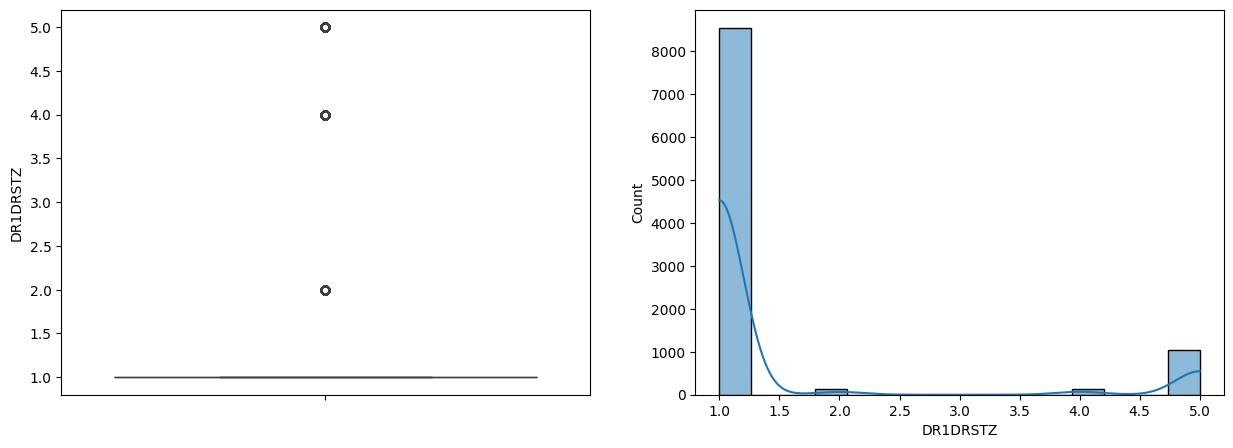

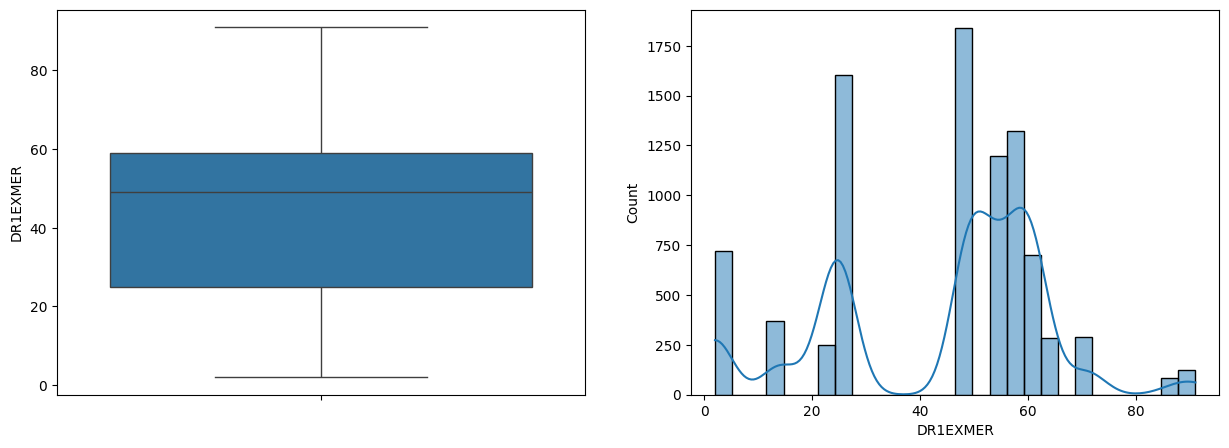

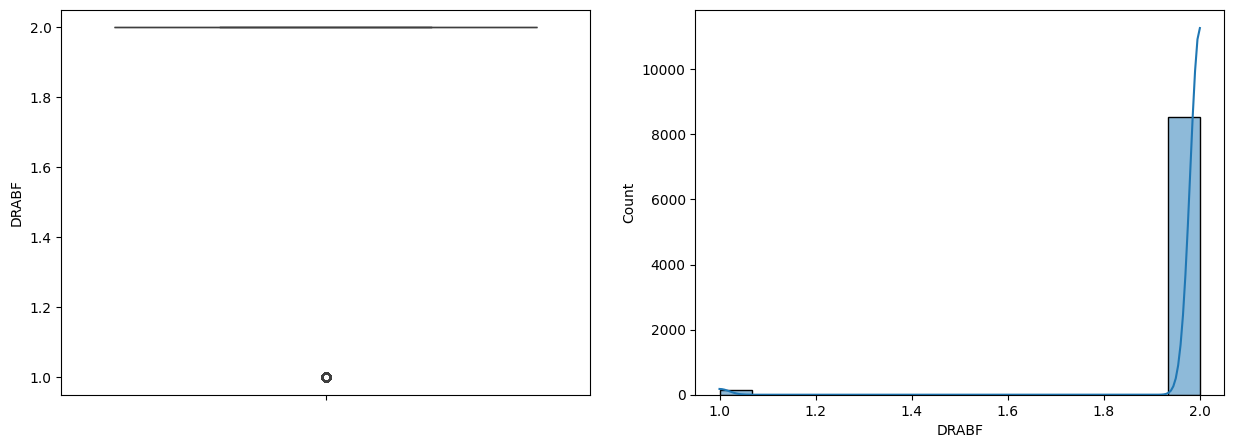

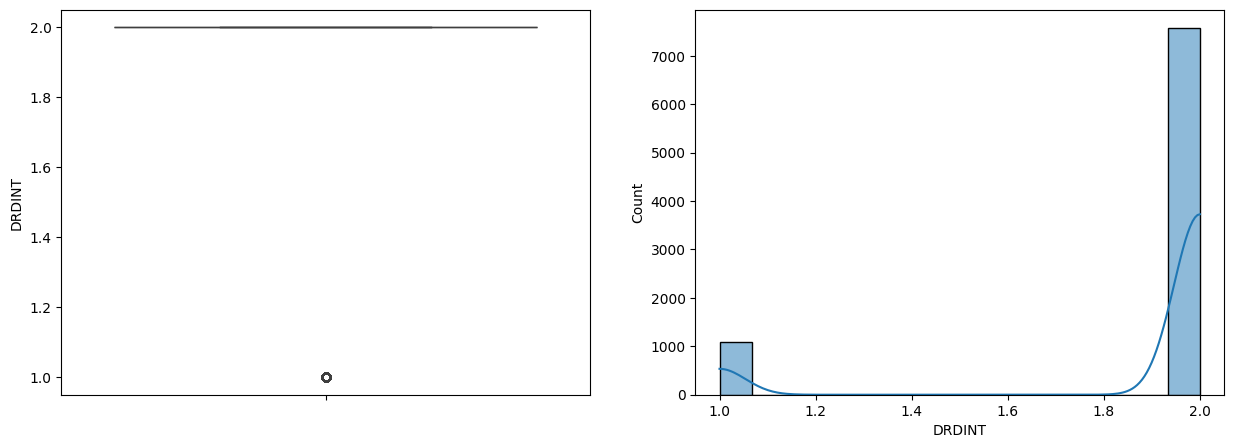

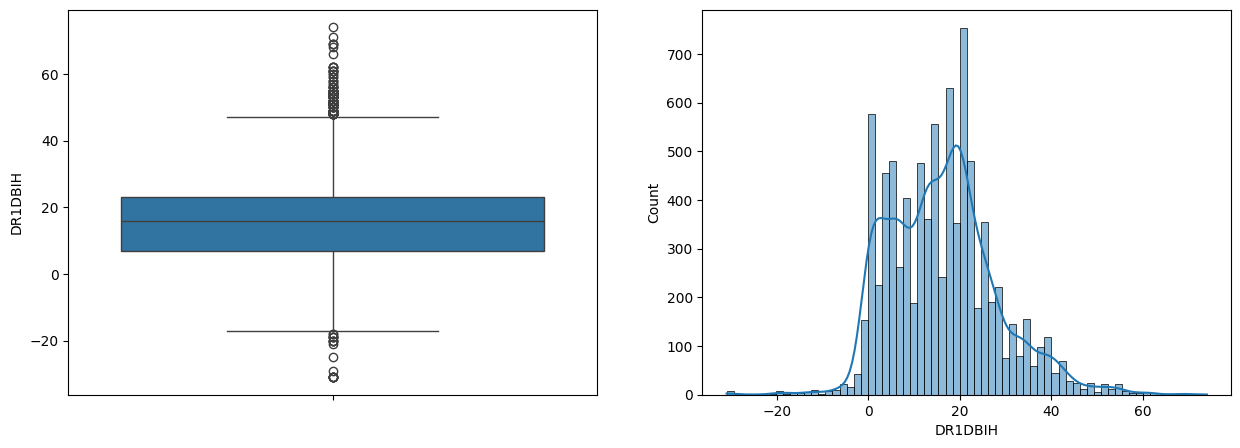

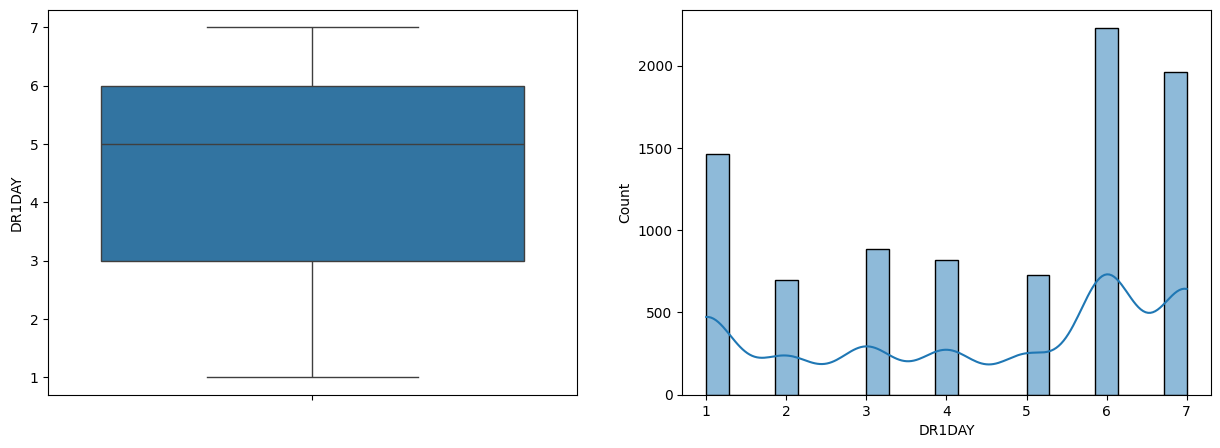

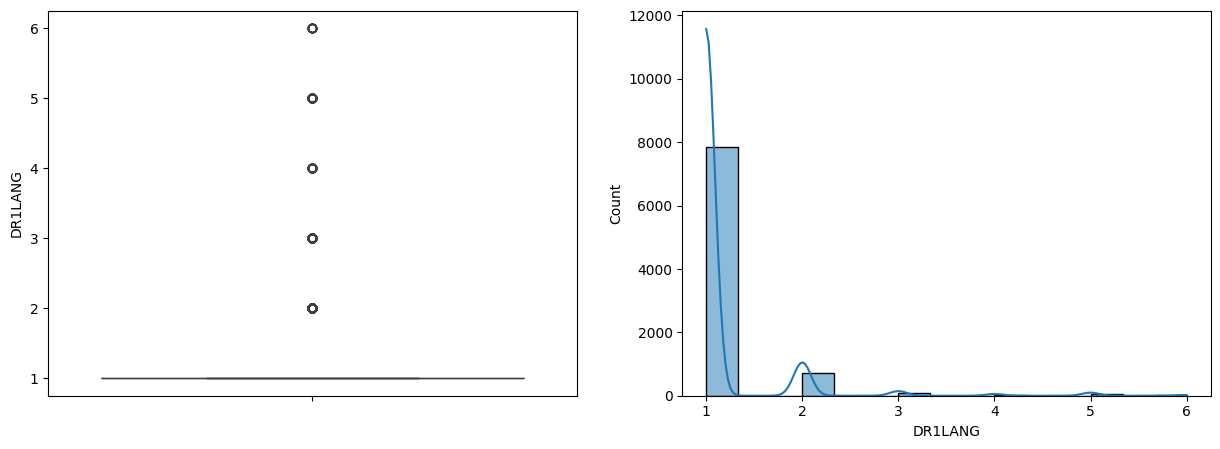

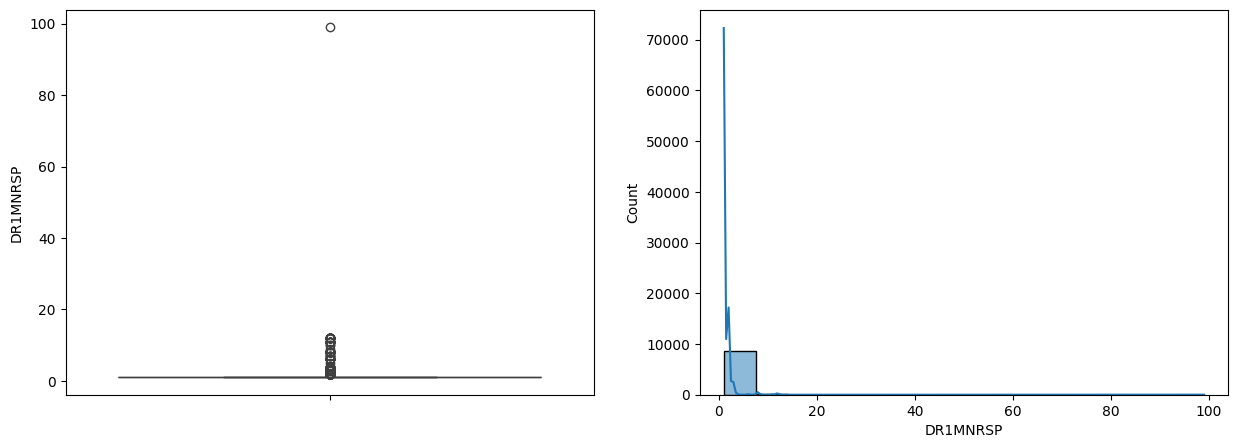

In [10]:
data_display = DataDisplay(diet_path)
data_display.box_hist_distribution_plot()

#### 3. Examination Dataset

In [11]:

examination_path = '/home/asma-rashidian/Documents/DrRahmani_projects/project1/data/raw/examination.csv'
examination_descriptor = Descriptor(examination_path)
examination_descriptor.basic_dataset_info()
examination_descriptor.stastistical_infos()


 Basic information from dataset:
----------------------------------------------------------------------------------------------------
 First 5 rows dataset
       PEASCST1  PEASCTM1  PEASCCT1  BPXCHR  BPAARM  BPACSZ  BPXPLS  BPXPULS  \
SEQN                                                                           
73557         1     620.0       NaN     NaN     1.0     4.0    86.0      1.0   
73558         1     766.0       NaN     NaN     1.0     4.0    74.0      1.0   
73559         1     665.0       NaN     NaN     1.0     4.0    68.0      1.0   
73560         1     803.0       NaN     NaN     1.0     2.0    64.0      1.0   
73561         1     949.0       NaN     NaN     1.0     3.0    92.0      1.0   

       BPXPTY  BPXML1  ...  CSXLEAOD  CSXSOAOD  CSXGRAOD  CSXONOD  CSXNGSOD  \
SEQN                   ...                                                    
73557     1.0   140.0  ...       2.0       1.0       1.0      1.0       4.0   
73558     1.0   170.0  ...       3.0       1.0

In [12]:
examination_cleaner = DataCleaner(examination_path)
examination_cleaner.drop_columns_with_null_values()
examination_cleaner.categorical_to_numerical()
examination_cleaner.fill_missing_values()
examination_cleaner.save_cleaned_dataset("examination")

----------------------------------------------------------------------------------------------------
 Categorical columns:
 
      OHX02CTC OHX03CTC OHX04CTC OHX05CTC OHX06CTC OHX07CTC OHX08CTC OHX09CTC  \
SEQN                                                                            
73557        P        P        P        P        P        P        P        P   
73558        Z        J        S        S        S        S        S        S   
73559        Z        Z        Z        S        S        S        S        Z   
73560        U        S        D        K        U        S        S        S   
73561        E        Z        E        Z        Z        Z        R        R   
...        ...      ...      ...      ...      ...      ...      ...      ...   
83727        S        S        S        M        S        S        S        S   
83728        U        U        U        D        D        D        D        D   
83729        Z        Z        E        Z        S        S      

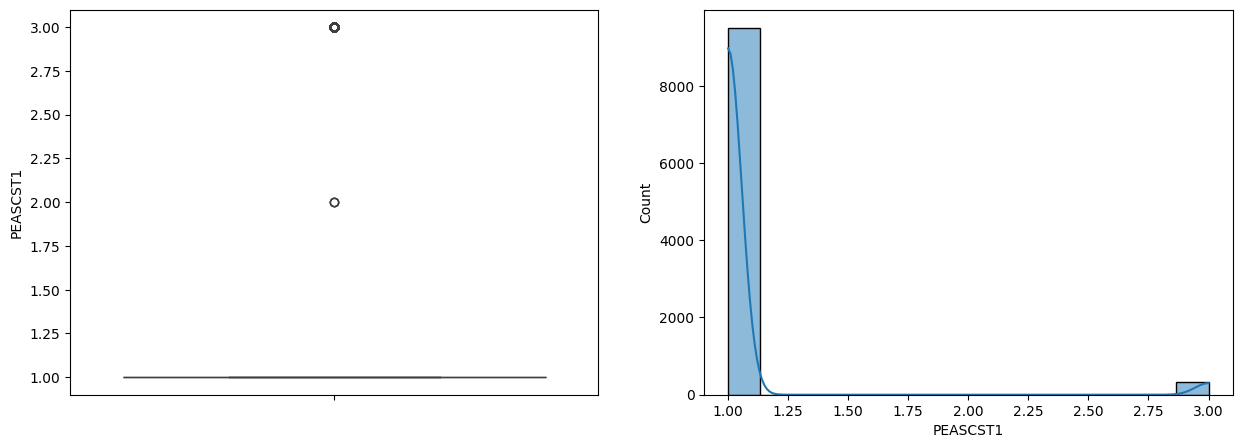

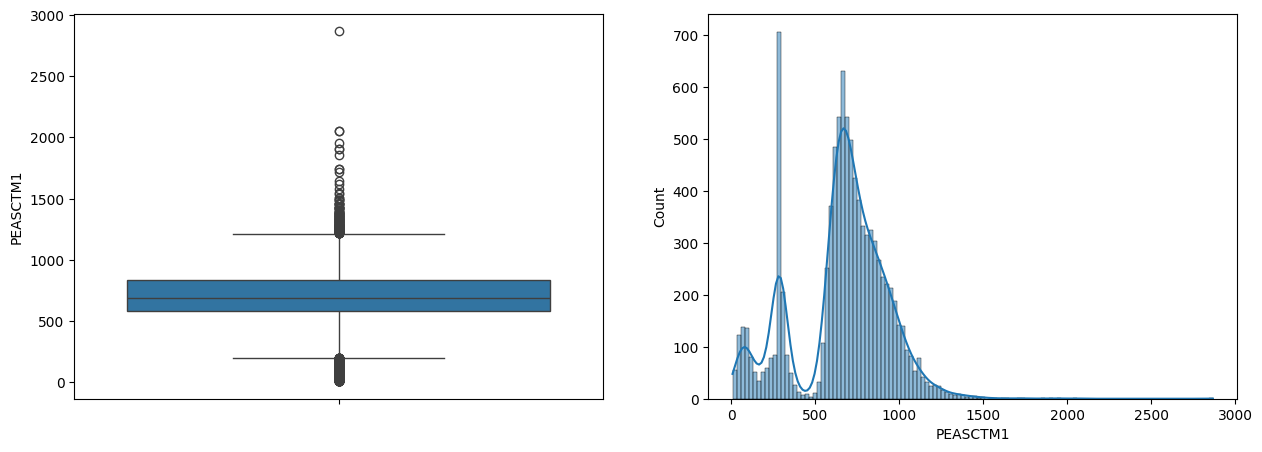

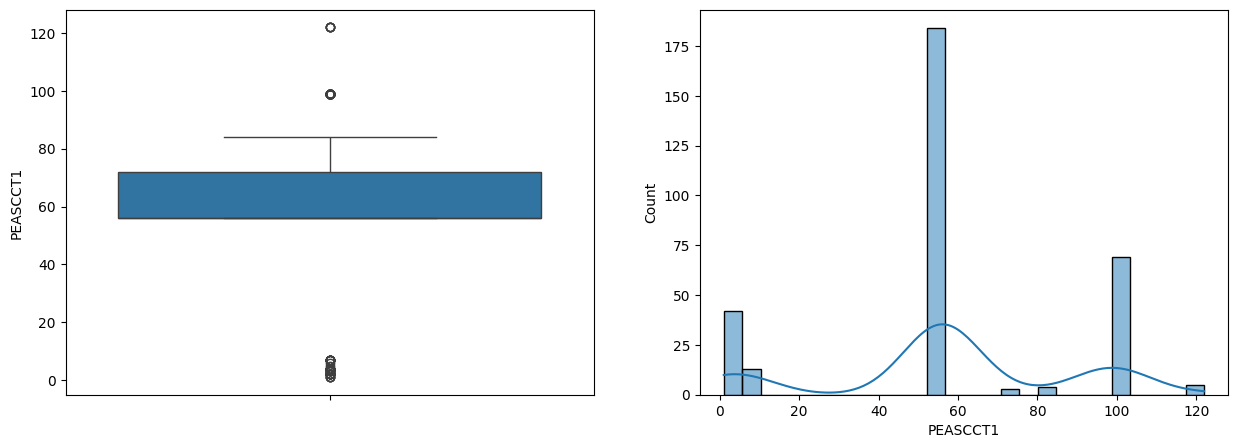

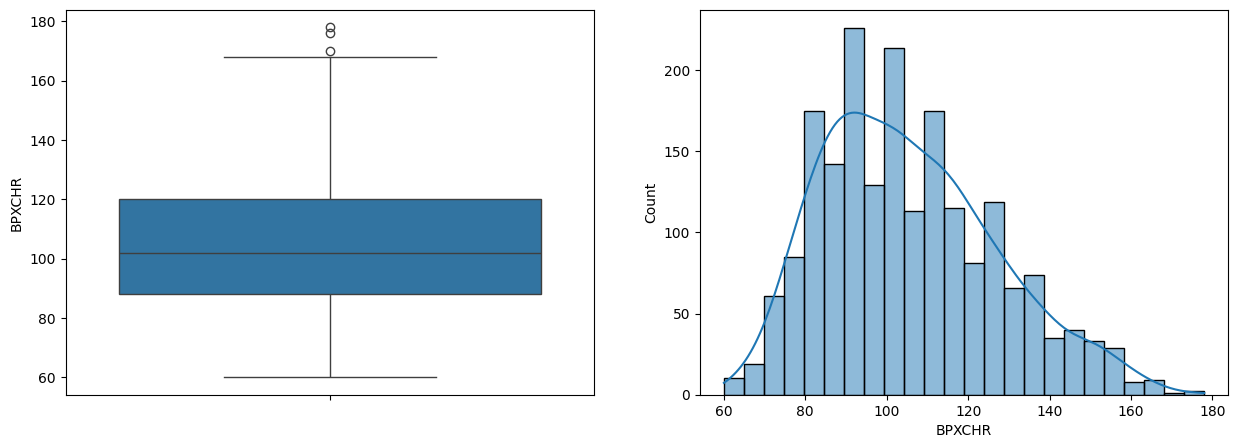

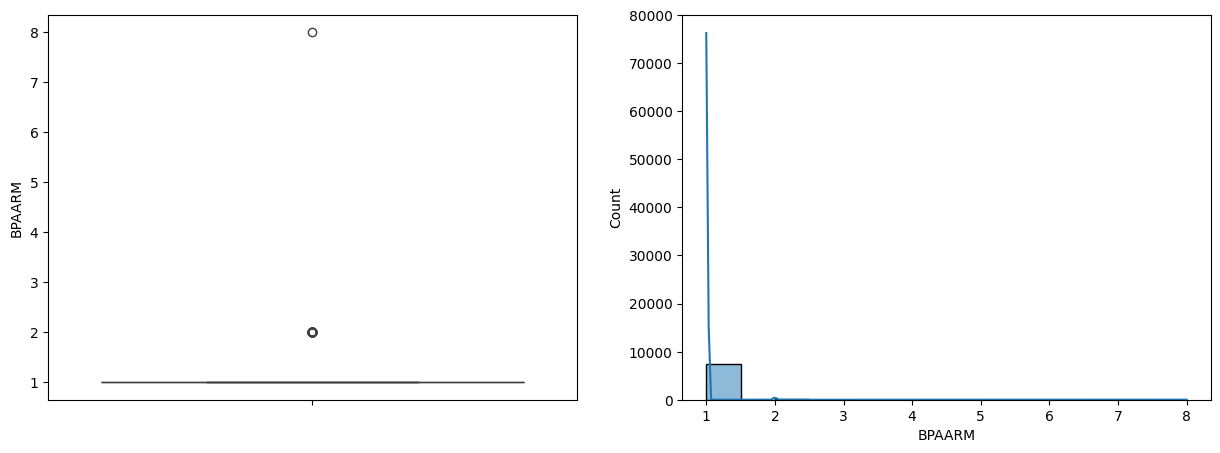

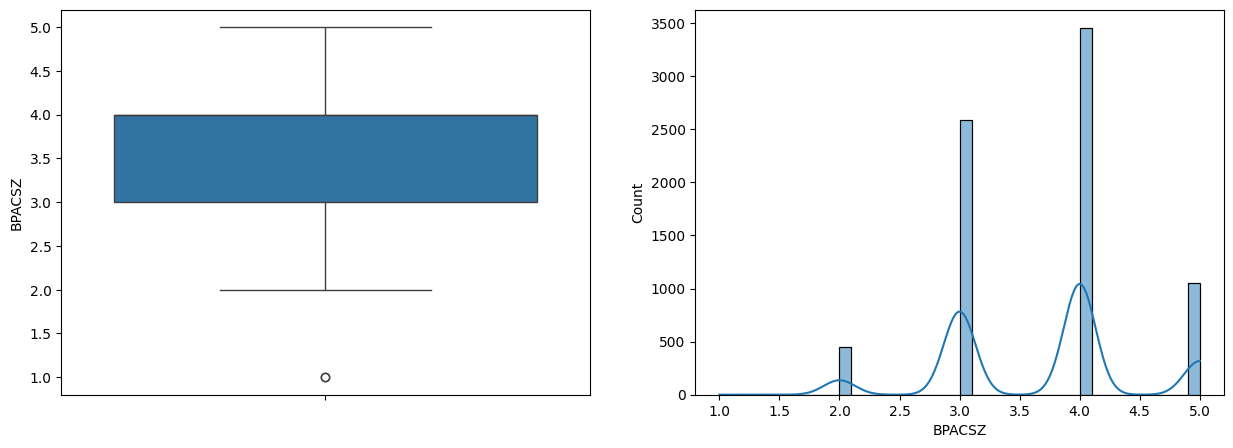

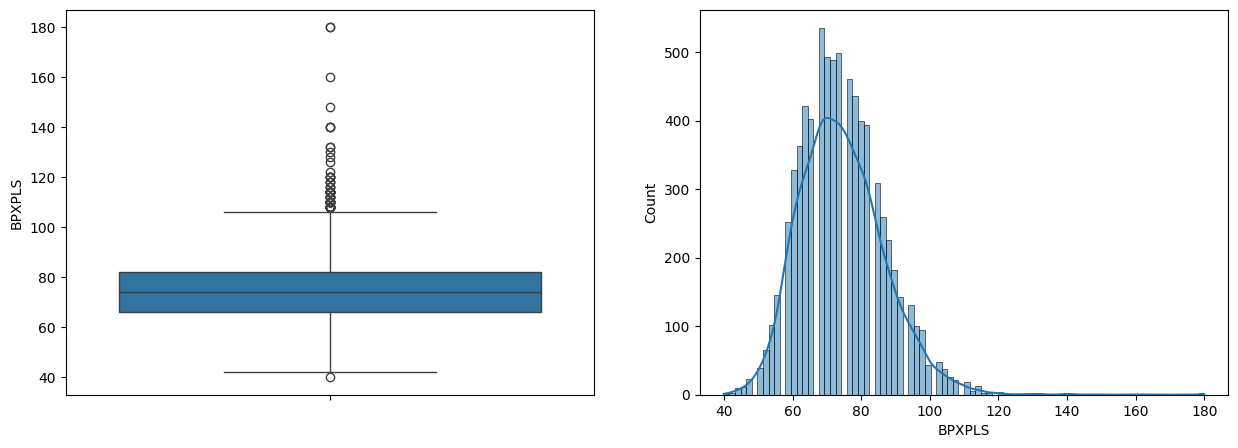

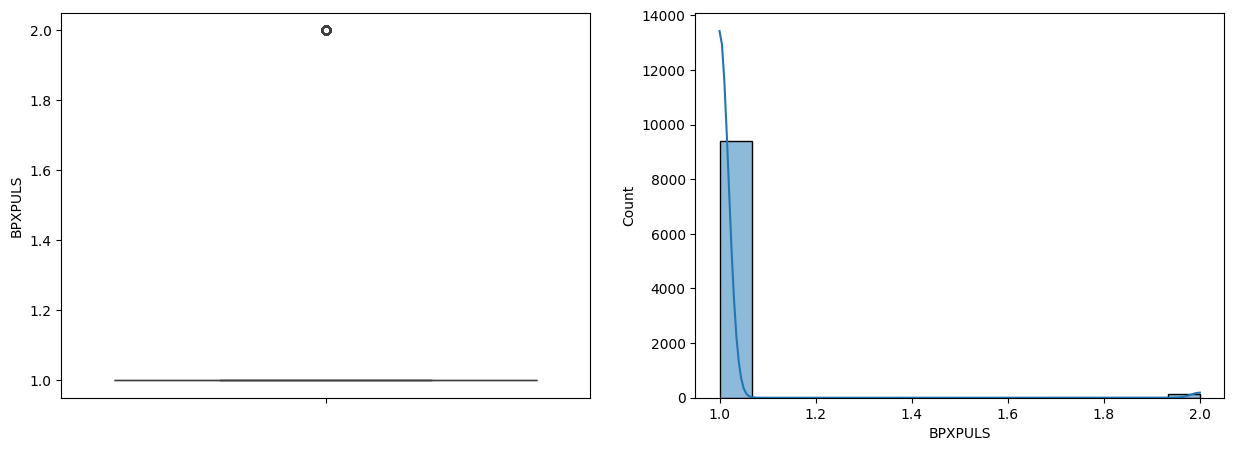

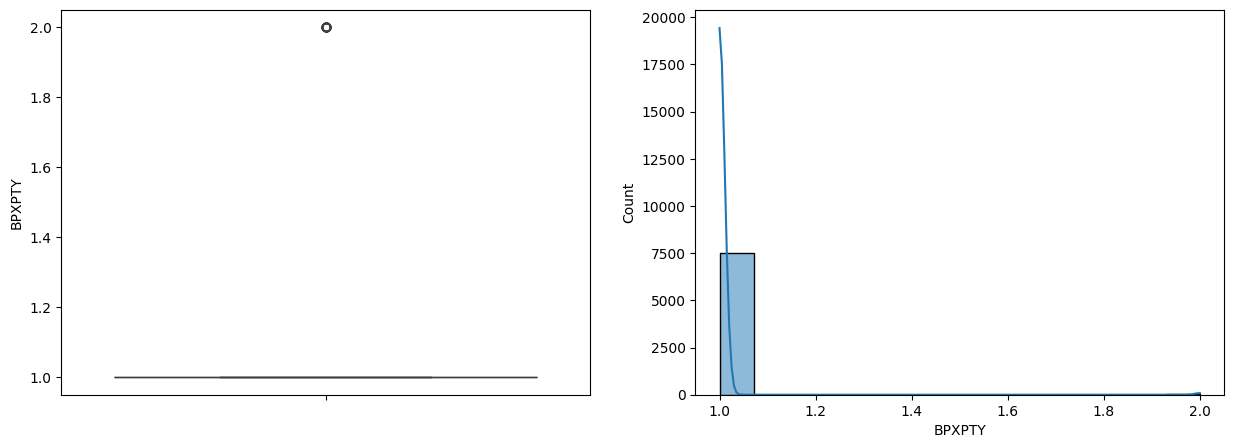

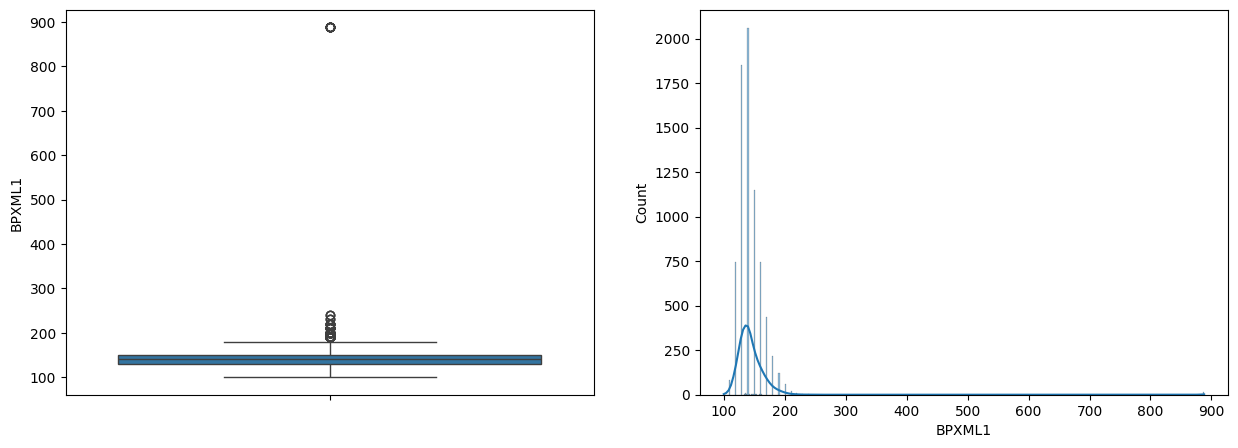

In [13]:
examination_display = DataDisplay(examination_path)
examination_display.box_hist_distribution_plot()

#### 4. Labs Dataset

In [14]:
lab_path = '/home/asma-rashidian/Documents/DrRahmani_projects/project1/data/raw/labs.csv'
lab_descriptor = Descriptor(lab_path)
lab_descriptor.basic_dataset_info()
lab_descriptor.stastistical_infos()

 Basic information from dataset:
----------------------------------------------------------------------------------------------------
 First 5 rows dataset
       URXUMA  URXUMS  URXUCR.x   URXCRS  URDACT     WTSAF2YR.x  LBXAPB  \
SEQN                                                                      
73557     4.3     4.3      39.0   3447.6   11.03            NaN     NaN   
73558   153.0   153.0      50.0   4420.0  306.00            NaN     NaN   
73559    11.9    11.9     113.0   9989.2   10.53  142196.890197    57.0   
73560    16.0    16.0      76.0   6718.4   21.05            NaN     NaN   
73561   255.0   255.0     147.0  12994.8  173.47  142266.006548    92.0   

       LBDAPBSI  LBXSAL  LBDSALSI  ...  URXUTL  URDUTLLC  URXUTU  URDUTULC  \
SEQN                               ...                                       
73557       NaN     4.1      41.0  ...     NaN       NaN     NaN       NaN   
73558       NaN     4.7      47.0  ...     NaN       NaN     NaN       NaN   
73559 

In [15]:

lab_cleaner = DataCleaner(lab_path)
lab_cleaner.drop_columns_with_null_values()
lab_cleaner.fill_missing_values()
lab_cleaner.save_cleaned_dataset("lab")


----------------------------------------------------------------------------------------------------

 Dimensions of the dataset:
(9813, 151)
----------------------------------------------------------------------------------------------------

 Number of missing values in each dimension:
URXUMA      1871
URXUMS      1871
URXUCR.x    1865
URXCRS      1761
URDACT      1781
            ... 
LBDBMNLC    4598
URXVOL1     1869
URDFLOW1    2663
LBDB12      4511
LBDB12SI    4497
Length: 151, dtype: int64
----------------------------------------------------------------------------------------------------


URXUMA         8.400
URXUMS         8.400
URXUCR.x     108.000
URXCRS      9370.400
URDACT         7.780
              ...   
LBDBMNLC       0.000
URXVOL1       86.000
URDFLOW1       0.647
LBDB12       513.000
LBDB12SI     379.300
Length: 151, dtype: float64
----------------------------------------------------------------------------------------------------


---------------------------------

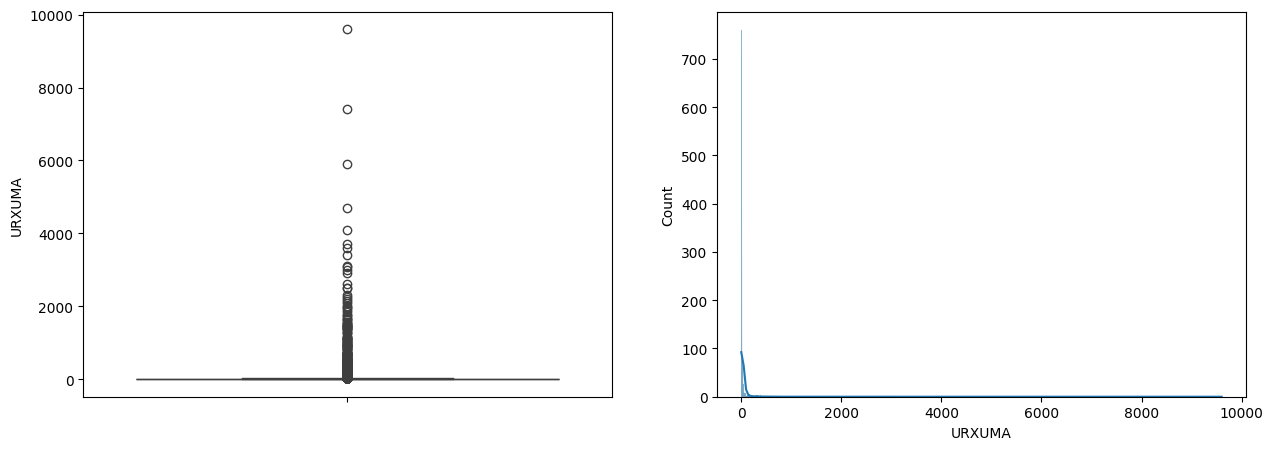

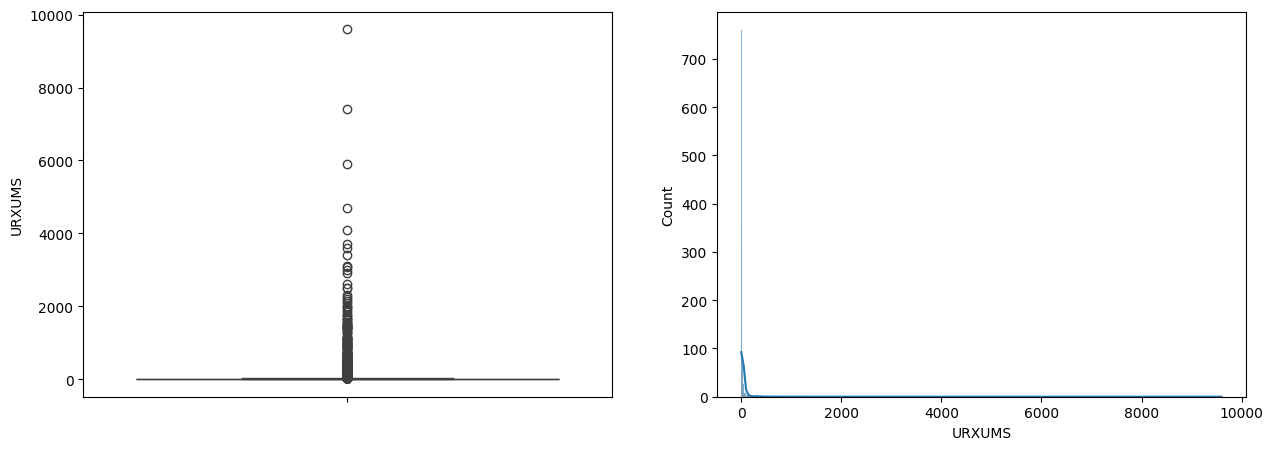

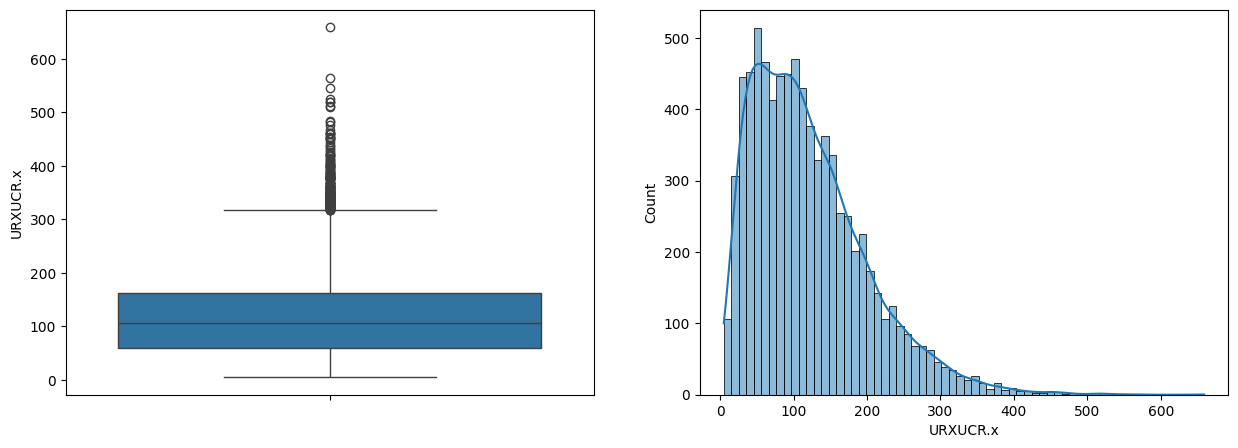

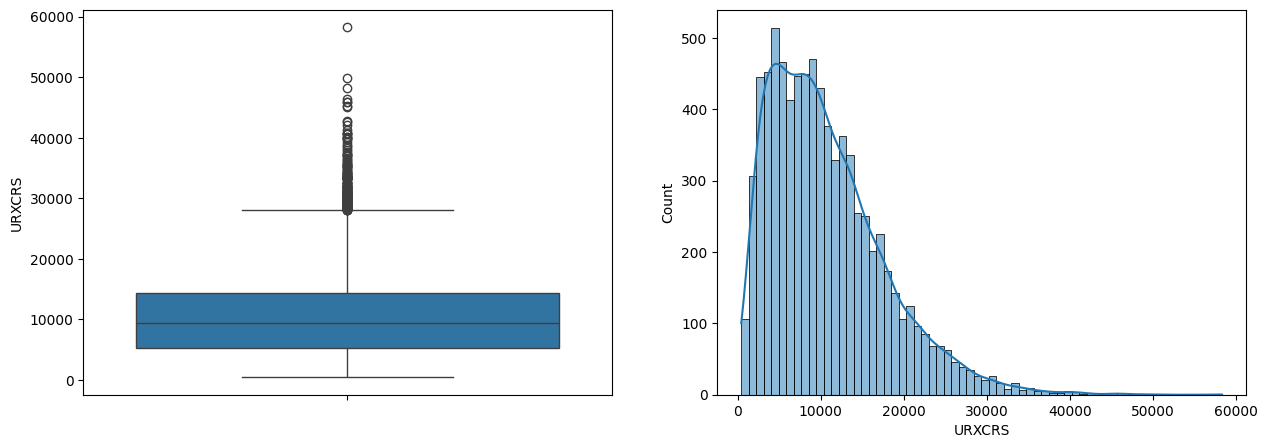

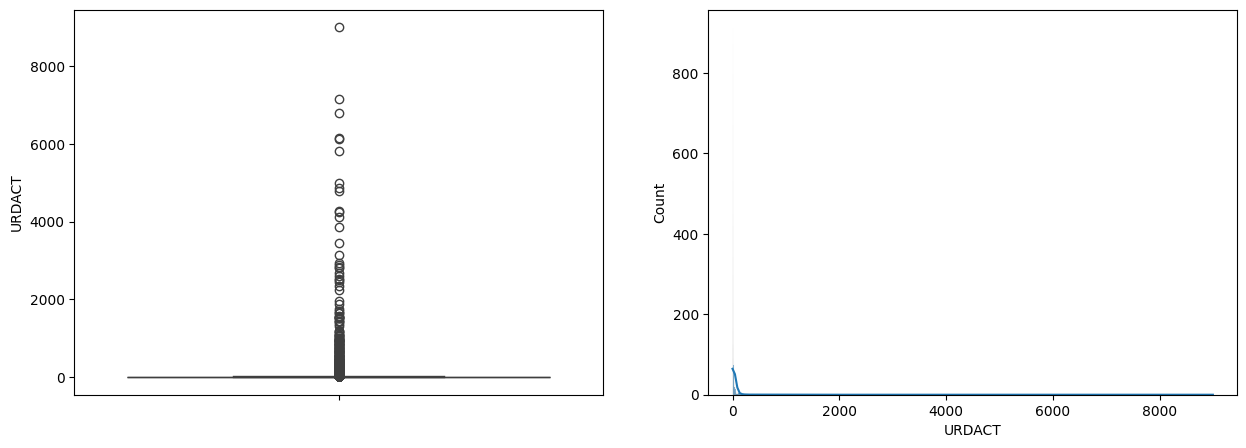

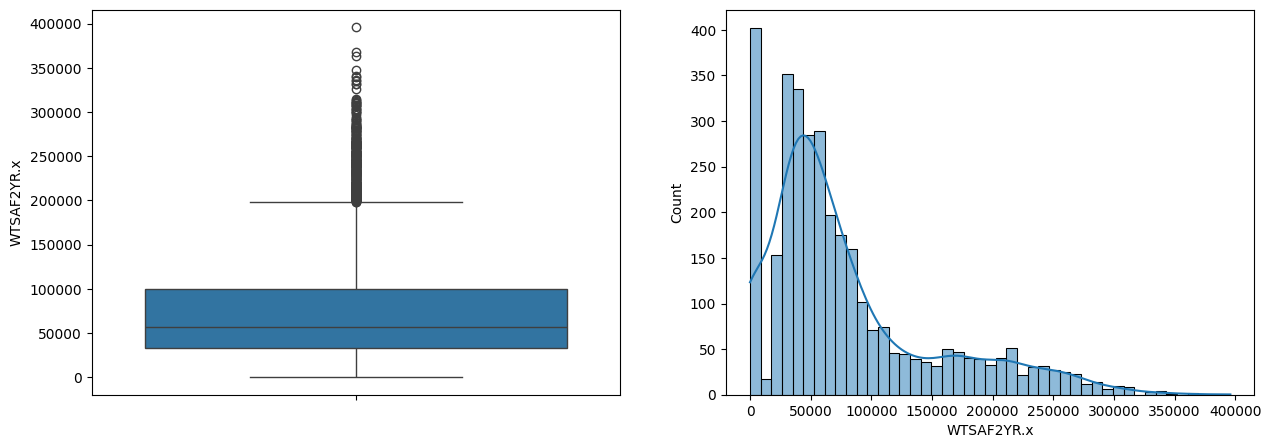

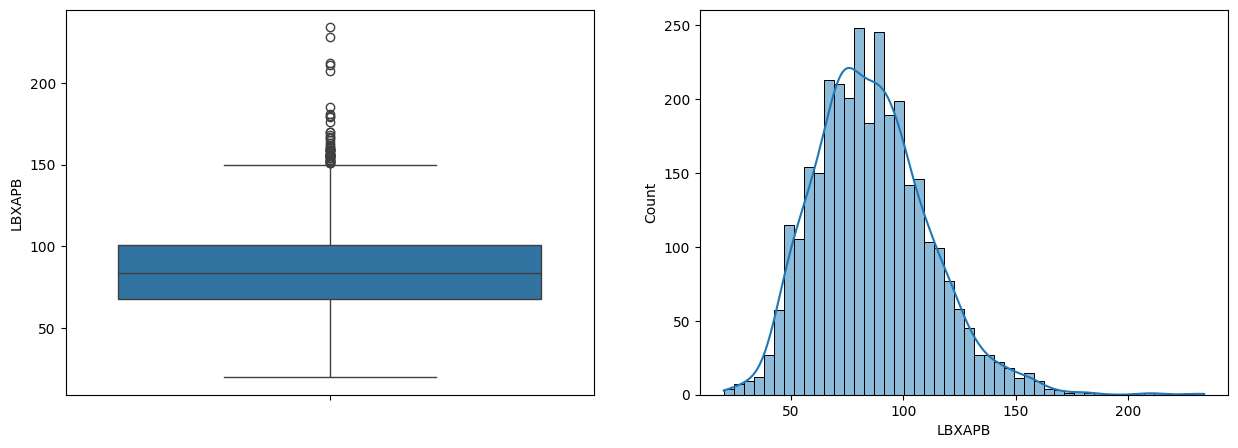

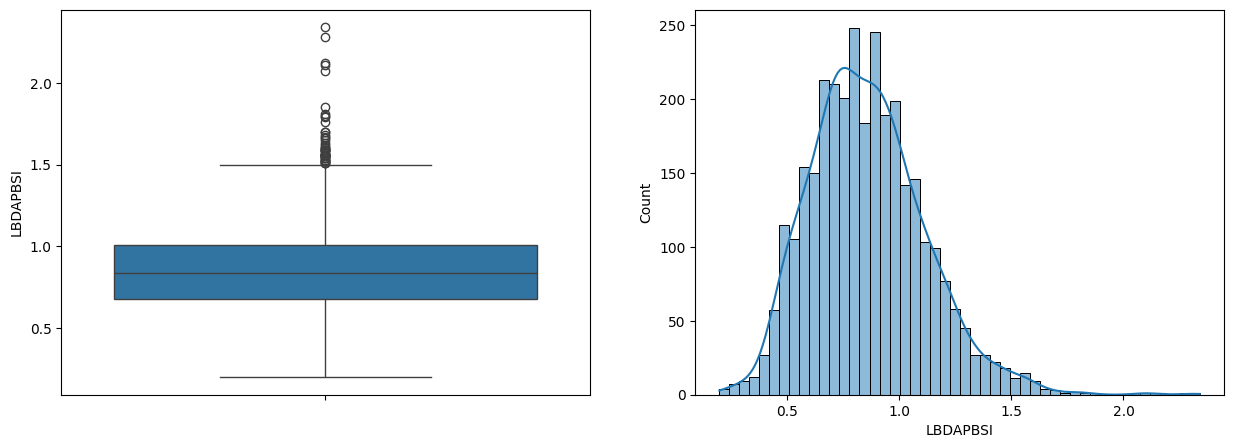

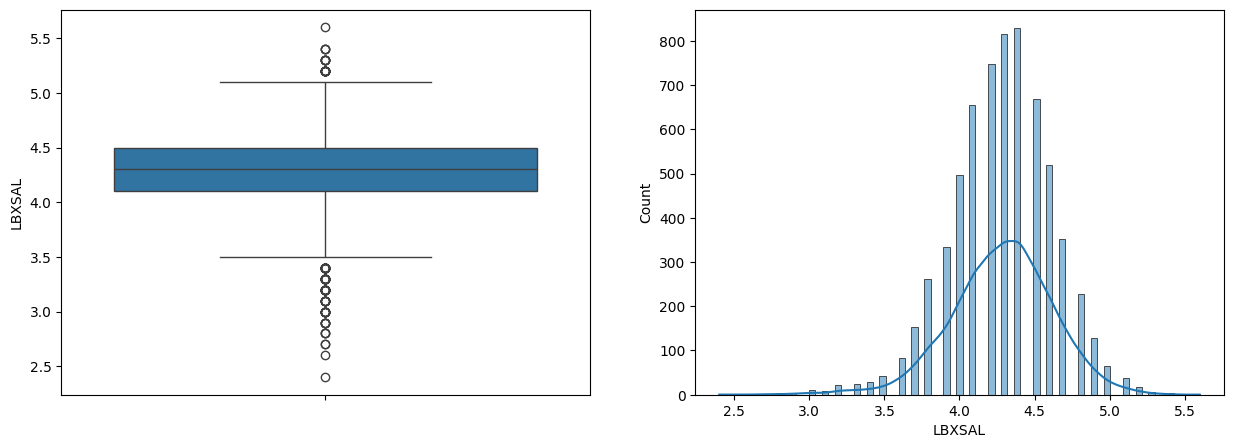

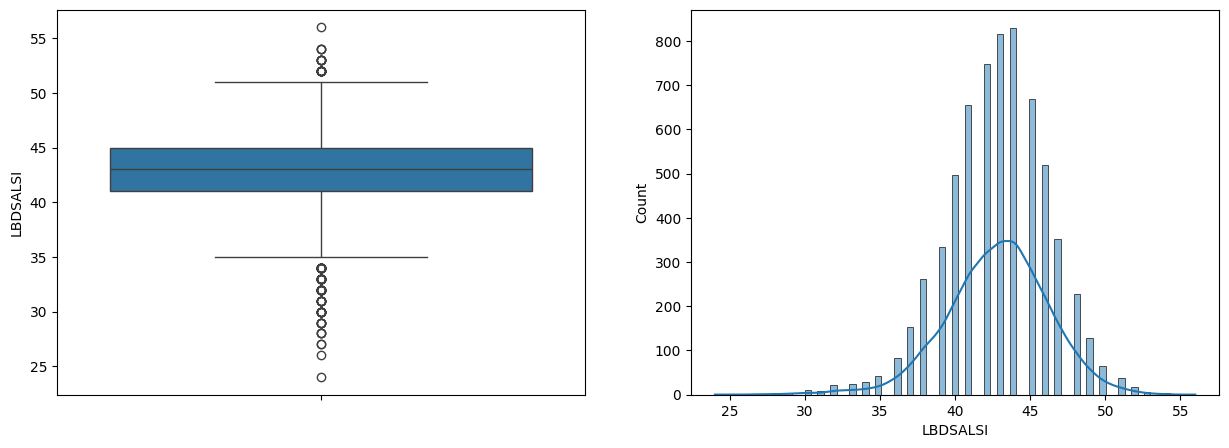

In [16]:
data_display = DataDisplay(lab_path)
data_display.box_hist_distribution_plot()

#### 5. Questionnaire Dataset

In [17]:
questionnaire_path = '/home/asma-rashidian/Documents/DrRahmani_projects/project1/data/raw/questionnaire.csv'
questionnaire_descriptor = Descriptor(questionnaire_path)
questionnaire_descriptor.basic_dataset_info()
questionnaire_descriptor.stastistical_infos()

 Basic information from dataset:
----------------------------------------------------------------------------------------------------
 First 5 rows dataset
       MCQ160L  MCQ220
SEQN                  
73557      2.0     2.0
73558      2.0     2.0
73559      2.0     1.0
73560      NaN     NaN
73561      2.0     2.0
----------------------------------------------------------------------------------------------------

 Dimensions of the dataset:
(10175, 2)
----------------------------------------------------------------------------------------------------

 Info of the data:
<class 'pandas.core.frame.DataFrame'>
Index: 10175 entries, 73557 to 83731
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MCQ160L  5769 non-null   float64
 1   MCQ220   5769 non-null   float64
dtypes: float64(2)
memory usage: 238.5 KB
None
----------------------------------------------------------------------------------------------------

 Checking the

In [18]:

questionnaire_cleaner = DataCleaner(questionnaire_path)
questionnaire_cleaner.drop_columns_with_null_values()
questionnaire_cleaner.fill_missing_values_target()
questionnaire_cleaner.save_cleaned_dataset("questionnaire")


----------------------------------------------------------------------------------------------------

 Dimensions of the dataset:
(10175, 2)
----------------------------------------------------------------------------------------------------

 Number of missing values in each dimension:
MCQ160L    4406
MCQ220     4406
dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

 Filling value is applied, so number of missing values in each dimension:
MCQ160L    0
MCQ220     0
dtype: int64
----------------------------------------------------------------------------------------------------

 Dimensions of the dataset:
(10175, 2)
----------------------------------------------------------------------------------------------------


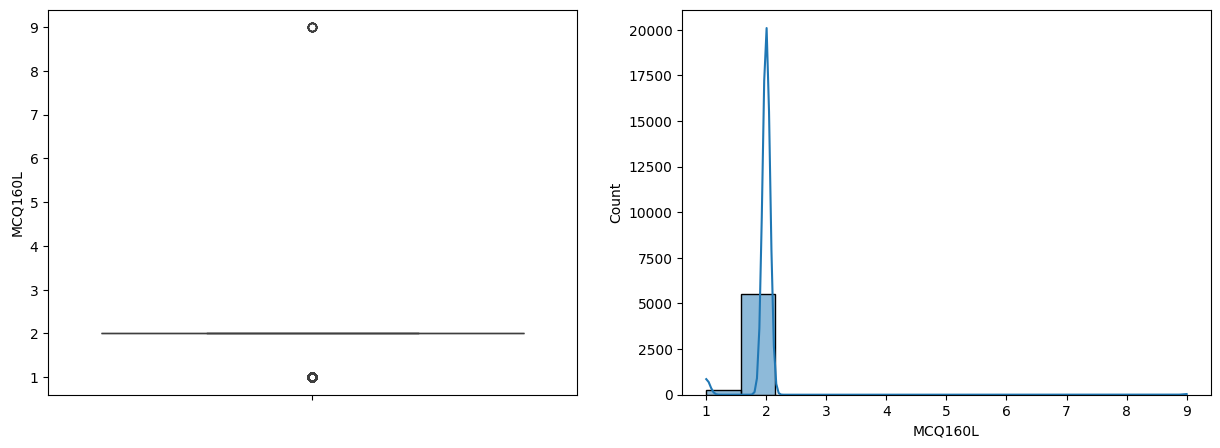

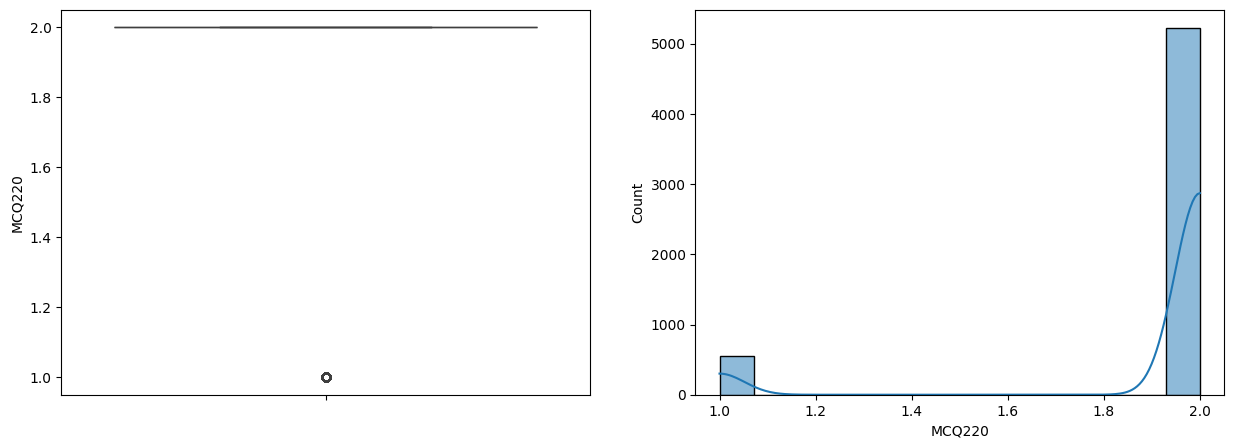

In [19]:
questionnaire_display = DataDisplay(questionnaire_path)
questionnaire_display.box_hist_distribution_plot()

#### Data Integration 

In [20]:

from functools import reduce
df1 = pd.read_csv('/home/asma-rashidian/Documents/DrRahmani_projects/project1/data/processed/lab.csv')
df2 = pd.read_csv('/home/asma-rashidian/Documents/DrRahmani_projects/project1/data/processed/examination.csv')
df3 = pd.read_csv('/home/asma-rashidian/Documents/DrRahmani_projects/project1/data/processed/diet.csv')
df4 = pd.read_csv('/home/asma-rashidian/Documents/DrRahmani_projects/project1/data/processed/examination.csv')
df5 = pd.read_csv('/home/asma-rashidian/Documents/DrRahmani_projects/project1/data/processed/questionnaire.csv')

integrated_df = [df.set_index('SEQN') for df in [df1, df2, df3, df4, df5]]
integrated_df = reduce(lambda l,r: l.combine_first(r), integrated_df)
integrated_df.to_csv("/home/asma-rashidian/Documents/DrRahmani_projects/project1/data/result/integrated_data.csv")
